In [2]:
import tensorflow as tf
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
import pickle
import random
import pandas as pd

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten,Conv2D,MaxPooling2D
import pickle

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
class MasterImage(object):

    def __init__(self,PATH='', IMAGE_SIZE = 50, CATEGORIES=[]):
        self.PATH = PATH
        self.IMAGE_SIZE = IMAGE_SIZE
        self.CATEGORIES = CATEGORIES
        self.image_data = []
        self.x_data = []
        self.y_data = []

    def Process_Image(self):

        """
        Return Numpy array of image
        :return: X_Data, Y_Data
        """

        for categories in self.CATEGORIES:                                                  # Iterate over categories

            train_folder_path = os.path.join(self.PATH, categories)                         # Folder Path
            class_index = self.CATEGORIES.index(categories)                             # this will get index for classification

            for img in os.listdir(train_folder_path):                                       # This will iterate in the Folder
                new_path = os.path.join(train_folder_path, img)                             # image Path

                try:        # if any image is corrupted
                    image_data_temp = cv2.imread(new_path,cv2.IMREAD_GRAYSCALE)                 # Read Image as numbers
                    image_temp_resize = cv2.resize(image_data_temp,(self.IMAGE_SIZE,self.IMAGE_SIZE))
                    self.image_data.append([image_temp_resize,class_index])
                except:
                    pass

        data = np.asanyarray(self.image_data)

        # Iterate over the Data
        for x in data:
            self.x_data.append(x[0])        # Get the X_Data
            self.y_data.append(x[1])        # get the label

        X_Data = np.asarray(self.x_data) / (255.0)      # Normalize Data
        Y_Data = np.asarray(self.y_data)

        return X_Data,Y_Data

    def pickle_image(self):

        """
        :return: None Creates a Pickle Object of DataSet
        """

        X_Data,Y_Data = self.Process_Image()

        pickle_out = open('X_Data','wb')
        pickle.dump(X_Data, pickle_out)
        pickle_out.close()

        pickle_out = open('Y_Data', 'wb')
        pickle.dump(Y_Data, pickle_out)
        pickle_out.close()

        print("Pickled Image Successfully ")

        return X_Data,Y_Data

    def load_dataset(self):

        try:
            X_Temp = open('X_Data','rb')
            X_Data = pickle.load(X_Temp)

            Y_Temp = open('Y_Data','rb')
            Y_Data = pickle.load(Y_Temp)

            print('Reading Dataset from PIckle Object')

            return X_Data,Y_Data

        except:
            print('Could not Found Pickle File ')
            print('Loading File and Dataset  ..........')
            X_Data,Y_Data = self.pickle_image()
            return X_Data,Y_Data


In [3]:
a = MasterImage(PATH='/Users/ELCOT/Desktop/1-Pneumonia Detection Using Chest X-Ray with Deep Learning/Pneumonia/chest_xray/train',
                    IMAGE_SIZE=80,
                    CATEGORIES=['NORMAL','PNEUMONIA'])

X_Data,Y_Data = a.load_dataset()
X_Data = X_Data.reshape(-1,80,80,1)
print(X_Data.shape)


Reading Dataset from PIckle Object
(5216, 80, 80, 1)


In [4]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X_Data, Y_Data, test_size=0.3,random_state=101)

In [5]:
model = Sequential()
model.add(Conv2D(200, (3, 3), input_shape=X_Data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(100, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(80))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
#model=model.summary()

In [6]:
model.fit(X_Data, Y_Data, batch_size=40, epochs=5, validation_split=0.3)
model.save('model.h5')

Train on 3651 samples, validate on 1565 samples
Epoch 1/5
3651/3651 [==============================] - 398s 109ms/sample - loss: 0.3584 - accuracy: 0.8395 - val_loss: 0.1342 - val_accuracy: 0.9585
Epoch 2/5
3651/3651 [==============================] - 425s 116ms/sample - loss: 0.1451 - accuracy: 0.9439 - val_loss: 0.1526 - val_accuracy: 0.9457
Epoch 3/5
3651/3651 [==============================] - 456s 125ms/sample - loss: 0.0986 - accuracy: 0.9625 - val_loss: 0.0527 - val_accuracy: 0.9840
Epoch 4/5
3651/3651 [==============================] - 524s 144ms/sample - loss: 0.0889 - accuracy: 0.9669 - val_loss: 0.1067 - val_accuracy: 0.9604
Epoch 5/5
3651/3651 [==============================] - 485s 133ms/sample - loss: 0.0735 - accuracy: 0.9723 - val_loss: 0.0674 - val_accuracy: 0.9776


In [7]:
model.evaluate(X_Test,Y_Test,batch_size=40)

1565/1565 [==============================] - 49s 32ms/sample - loss: 0.0549 - accuracy: 0.9796


[0.054907464479005484, 0.9795527]

In [1]:
from keras.models import load_model
model.save("model1.h5")

Using TensorFlow backend.


NameError: name 'model' is not defined

In [ ]:
from keras.models import load_model
model.save_weights("model1_weights.h5")

In [8]:
def prepare(filepath):
    training_date = []
    
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(80,80))
    new_image =  new_array.reshape(-1,80,80,1)
    return new_image

In [5]:
model = tf.keras.models.load_model('model.h5')

C:/Users/ELCOT/Desktop/1-Pneumonia Detection Using Chest X-Ray with Deep Learning/Pneumonia/chest_xray/val/Normal/NORMAL2-IM-1427-0001.jpeg


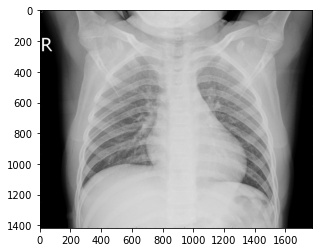

In [3]:
filepath = 'C:/Users/ELCOT/Desktop/1-Pneumonia Detection Using Chest X-Ray with Deep Learning/Pneumonia/chest_xray/val/Normal/NORMAL2-IM-1427-0001.jpeg'
img_array = cv2.imread(filepath)
image_array=np.array(img_array)
print(image_array)

plt.imshow(img_array)

In [8]:
img_array = cv2.imread(filepath)
image_array=np.array(img_array).shape[2]
print(image_array,filepath)

3 C:/Users/ELCOT/Desktop/1-Pneumonia Detection Using Chest X-Ray with Deep Learning/Pneumonia/chest_xray/val/Normal/NORMAL2-IM-1427-0001.jpeg


In [ ]:
import scipy.ndimage
height,width,channels = scipy.ndimage.im

In [11]:
test = model.predict([prepare(filepath=filepath)])
CATEGORIES=['NORMAL','PNEUMONIA']
print(CATEGORIES[int(test[0][0])])

NORMAL


In [6]:
import tkinter as tk
from tkinter.filedialog import askopenfilename
import shutil
import os
import sys
from PIL import Image, ImageTk

window = tk.Tk()

window.title("PNEUMONIA DETECTION")

window.geometry("500x510")
window.configure(background ="black")

title = tk.Label(text="Click below to choose picture for testing disease....", background = "black", fg="white", font=("", 15))
title.grid()
def exit():
    window1.destroy()

def prepare(filepath):
    training_date = []
    img_array = cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array,(80,80))
    new_image =  new_array.reshape(-1,80,80,1)
    return new_image

def analysis():
    test = model.predict([prepare(filepath=filepath)])
    CATEGORIES=['NORMAL','PNEUMONIA']
    print(CATEGORIES[int(test[0][0])])
    if CATEGORIES[int(test[0][0])]=="NORMAL":
        message = tk.Label(window1,text='Status: '+CATEGORIES[int(test[0][0])], background="white",
                           fg="black", font=("", 15))
        window1.configure(background="white")

    else:
        message = tk.Label(window1,text='Status: '+CATEGORIES[int(test[0][0])], background="black",
                           fg="white", font=("", 15))   
        window1.configure(background="black")

    message.grid(column=0, row=3, padx=10, pady=10)
    button = tk.Button(window1,text="Exit", command=exit)
    button.grid(column=0, row=9, padx=20, pady=20)

def openphoto():
    global filepath
    global window1
    window1 = tk.Toplevel(window)

    window1.title("PNEUMONIA DTECTION")

    window1.geometry("500x520")
    window1.configure(background="white")

    filepath = askopenfilename(initialdir='C:/Users/ELCOT/Desktop/1-Pneumonia Detection Using Chest X-Ray with Deep Learning/Pneumonia/chest_xray', title='Select image for analysis ',
                           filetypes=[('image files', '.jpeg')])
    load = Image.open(filepath)
    load= load.resize((250,490),Image.ANTIALIAS)
    render = ImageTk.PhotoImage(load)
    img = tk.Label(window1,image=render, height="250", width="490")
    img.image = render
    img.place(x=0, y=0)
    img.grid(column=0, row=0, padx=5, pady = 5)
    button2 = tk.Button(window1,text="Analyse Image", command=analysis)
    button2.grid(column=0, row=2, padx=10, pady = 10)
    window1.mainloop()
button1 = tk.Button(text="Get Photo", command = openphoto)
button1.grid(column=0, row=1, padx=10, pady = 10)
window.mainloop()



NORMAL
NORMAL
PNEUMONIA
NORMAL
PNEUMONIA
PNEUMONIA
NORMAL
PNEUMONIA
PNEUMONIA
PNEUMONIA
PNEUMONIA
NORMAL
NORMAL
NORMAL
PNEUMONIA
PNEUMONIA
